In [ ]:
#import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime as dt
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Input, Activation, concatenate, Dropout
from keras import regularizers 
from keras import optimizers
import math
import matplotlib.pyplot as plt
import os
import urllib.request, json
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#get the data and prices for a specific stock
prices = pd.read_csv('drive/MyDrive/prices.csv')
stock = input("Enter a stock ticker: ")
data = prices.filter(like=stock)

Enter a stock ticker: AAPL


In [ ]:
#scale the data
data=data.values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[0.00480986]
 [0.00428017]
 [0.00436436]
 ...
 [0.98666554]
 [0.97823995]
 [0.97069359]]


In [ ]:
train = scaled_data

In [ ]:
#make the x and y train datasets
x_train = []
y_train = []

for i in range(200,len(train)):
  x_train.append(train[i-200:i, 0])
  y_train.append(train[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(5084, 200, 1)

In [ ]:
#make the model
lstm_input = Input(shape=(x_train.shape[1], 1), name='input_layer')
x = LSTM(50, name='lstm_1', return_sequences=False)(lstm_input)
x = Dense(60, name='dense_1', bias_regularizer='l2')(x)
x = Activation('sigmoid', name='sigmoid')(x)
x = Dense(1, name='prices_out')(x)
out = Activation('linear', name='linear_out')(x)

model = Model(inputs=lstm_input, outputs=out)

adam = optimizers.Adam(learning_rate=0.003)

model.compile(optimizer=adam, loss='mse')

In [ ]:
#train the model
history = model.fit(x=x_train, y=y_train, batch_size=50, epochs=50)

Epoch 1/50
102/102 [==============================] - 11s 85ms/step - loss: 0.2446
Epoch 2/50
102/102 [==============================] - 9s 85ms/step - loss: 4.8877e-04
Epoch 3/50
102/102 [==============================] - 9s 88ms/step - loss: 2.8505e-04
Epoch 4/50
102/102 [==============================] - 9s 88ms/step - loss: 1.8008e-04
Epoch 5/50
102/102 [==============================] - 9s 88ms/step - loss: 1.1148e-04
Epoch 6/50
102/102 [==============================] - 9s 92ms/step - loss: 8.0377e-05
Epoch 7/50
102/102 [==============================] - 10s 94ms/step - loss: 7.6626e-05
Epoch 8/50
102/102 [==============================] - 10s 94ms/step - loss: 6.2979e-05
Epoch 9/50
102/102 [==============================] - 10s 96ms/step - loss: 6.8387e-05
Epoch 10/50
102/102 [==============================] - 9s 91ms/step - loss: 7.1219e-05
Epoch 11/50
102/102 [==============================] - 9s 87ms/step - loss: 5.0914e-05
Epoch 12/50
102/102 [==============================]

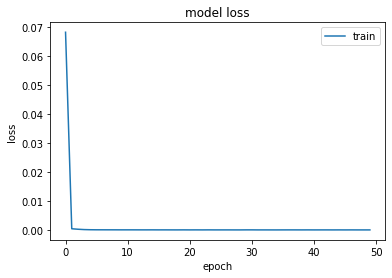

In [ ]:
#plot the loss curve
#plt.plot(history.history['loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train'], loc='upper right')
#plt.show()

In [ ]:
#predict the next 500 values
predictions = []
train2 = train

for  i in range(500):
  x_train = []

  for i in range(200,len(train)):
    x_train.append(train[i-200:i, 0])

  x_train = np.array(x_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  y_test_pred = model.predict(x=x_train[(len(x_train) - 1)::])
  predictions.append(y_test_pred[0])
  train = np.append(train, y_test_pred, axis=0)

#turns predictions into a numpy array and gives it the correct shape
predictions = np.array(predictions)
predictions = scaler.inverse_transform(predictions)
train2 = scaler.inverse_transform(train2)

In [ ]:
print(train.shape)
print(train2.shape)
print(x_train.shape)
print(predictions.shape)

(5784, 1)
(5284, 1)
(5583, 200, 1)
(500, 1)


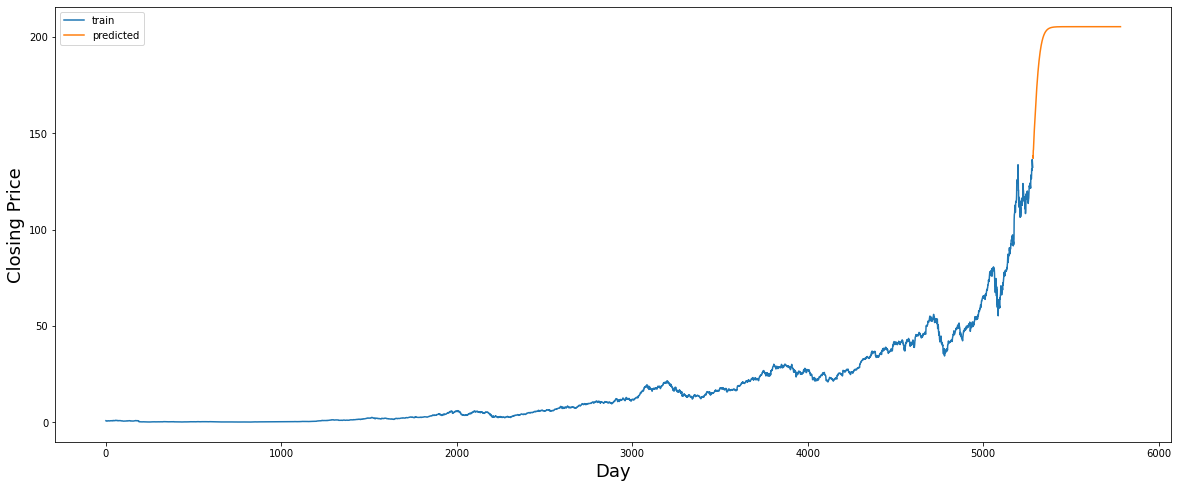

In [ ]:
#plot the data and predictions
#train = data[:trainingdata_len]
#valid = data[trainingdata_len:]
#valid['Predictions'] = predictions
#^From S.T.O.N.K.S
x2 = range(len(train2), len(predictions) + len(train2))
x3 = range(len(train2))
plt.figure(figsize=(20,8))
plt.plot(x3, train2, label = 'train') #remove this line to take the train data off the graph
plt.plot(x2, predictions, label = 'predicted')
plt.xlabel('Day', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.legend()
plt.show()
